<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/master/Search_patterns_right_in_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
GLOBALS__={}

#MAIN

In [2]:
#@title  { form-width: "300px", display-mode: "form" }
import os






# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys
# ====================================
# ====================================
_git_branch = "in-tensors"  # @param {type:"string"}
# ====================================
# ====================================


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow_hub as hub

#
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML


 

# AZ:- THE CODE----------------------------------------------------------------------------------

def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from renderer import HtmlRenderer
  from renderer import to_multicolor_text
  from renderer import known_subjects_dict

  from structures import ContractSubject
  from contract_parser import ContractDocument3

  from ml_tools import ProbableValue

  from legal_docs import LegalDocument
  from renderer import as_warning, as_headline_3, as_offset, as_smaller

  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      return super()._to_color_text(tokens, weights, mpl, colormap=colormap, _range=_range)

    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

     
     

     
  GLOBALS__['renderer'] = DemoRenderer()

  # AZ:----------PROTOCOLS RENDERER-------------------------

   

 

  GLOBALS__['_init_the_code'] = True
  print("❤️ DONE initializing the code")

  # AZ:-------------------------------------------------Init Protocols context===



def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs

  
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX

"""# step 0. Инит"""

## do preparation here

# 1.
_init_import_code_from_gh()
 
# 3.
_init_the_code(True)



W0427 17:58:30.485067 140576653293440 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


fetching code from GitHub.....in-tensors


🦊 GIT revision:
401
* in-tensors
Created using Colaboratory
Merge branch 'protocols-2' into in-tensors

Something pulled up to renderer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub
❤️ DONE initializing the code


## TF


#### Prepare model

1. populate array of indexes: token index X pattern index, pattern length 
2. embedd text
3. embedd patterns

# A model 💎 for finding closest embedding to a pattern
1. At first stage, we calculate attention vectors (AV) for every pattern
2. Then, for each AV we're finding the closest point (`best point`) in text embedding space, 
3. Then we're calculating "improved" vectors -- we calculate distance from the `"best point"` (actually, from the best *window*)  to each point in text embedding space.  
  
WARNING: this should be used only if `best point` is close enough to the pattern

#### Test

In [0]:

uploaded = """
Берлинская дада-ярмарка и Международная выставка сюрреализма в париж­ской галерее «Изящные искусства» в 1938 году стали высшими точками развития двух движений и подвели им итог. На «Сюрреалис­тической улице», за манекенами, выстроившимися в проходе в главный зал, располагались плакаты, приглашения, объявления и фотографии, отсылающие к ранним этапам сюрреализма. В главном зале, за оформление которого отвечал Марсель Дюшан 
 
, а за освеще­ние — Ман Рэй 
 
, картины 1920-х годов висели рядом с более ранними работами, что подчеркивало развити
е сюрреалистического «интернаци­она­ла». Зародившись как литературное течение, к концу 1930-х годов сюрреализм уже около 15 лет господствовал в художественном авангарде Парижа. Прежде чем пойти на спад с началом
Второй мировой войны, он стал частью светской культуры Парижа и даже до некотоРой
степени присягнул высокой моде, подобно тому как русский авангард — пусть совсем иначе — присягну 
в свое время революции. Изящество стиля, свойственное сюррелизму, способствоало этому 
сближению, которое, в свою очередь, упрочило положение многих представителей направления в обществе. 
Однако поначалу для литераторов и художников-бунтарей, ничуть не стремившихся к социаль­ному успеху, 
была куда более естественной связь с дадаизмом"""


from text_tools import tokenize_text

patterns_tokens = [
    tokenize_text("Берлинская"), 
    tokenize_text("естественная связь с дадаизмом"), 
    tokenize_text('литературное течение')]

patterns_tokens_lens=[len(x) for x in patterns_tokens]
maxlen =  max( patterns_tokens_lens)

#padding:
patterns_tokens_ext=[ x+[' ']*(maxlen-len(x)) for x in patterns_tokens ]
#print(patterns_tokens_ext)



#UNCOMMENT TO UPLOAD============================================================
# uploaded = interactive_upload('Protocol')[0]
TOKENS=tokenize_text(uploaded)
 


# Improving the graph, finalizing it

In [0]:
import tensorflow as tf
from typing import List

import numpy as np
import tensorflow as tf

# returs
from text_tools import Tokens

def make_embedding_session():
  embedding_graph = tf.Graph()

  with embedding_graph.as_default():
    elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz', trainable=False)

    init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])

    text_input_p = tf.placeholder(dtype=tf.string, shape=None)
    lengths_p = tf.placeholder(dtype=tf.int32, shape=None)

    # 1. text embedding
    text_embeddings = elmo(
      inputs={
        "tokens": text_input_p,
        "sequence_len": lengths_p
      },
      signature="tokens",
      as_dict=True)["elmo"]

  embedding_graph.finalize()

  # Create session and initialize.
  embedding_session = tf.Session(graph=embedding_graph)
  embedding_session.run(init_op)

  return embedding_session, text_embeddings, text_input_p, lengths_p


embedding_session, text_embeddings, text_input_p, lengths_p = make_embedding_session()


In [8]:
%%time
if "___TEST" in globals():
  emb_ = embedding_session.run(text_embeddings, feed_dict={text_input_p: [TOKENS], lengths_p:[len(TOKENS)]})
  print(emb_.shape)
  
  
if "___TEST" in globals():
  for k in range(30):
    emb_ = embedding_session.run(text_embeddings, feed_dict={text_input_p: [TOKENS ], lengths_p:[len(TOKENS)]})
    print(emb_.shape)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


In [12]:
%%time

def find_patterns(words, patterns_tokens: List[Tokens], patterns_tokens_lens_: List[int]):
  """

  :param words: tokenized text
  :param patterns_tokens: list of list
  :param patterns_tokens_lens_:
  :return: matrix of shape [M , N] where M is the number of patterns, and N is the number of words
  """

  TOKENS_N = len(words[0])
  PATTERN_N = len(patterns_tokens)

  padding = max(patterns_tokens_lens_) - 1
  words_with_padding = words[0] + ['\n'] * padding

  indexes = []
  # Populate array of indexes: token index X pattern index, pattern length
  for pi in range(PATTERN_N):
    for ti in range(TOKENS_N):
      indexes.append(np.array([ti, pi, patterns_tokens_lens_[pi]]))

  indexes = np.array(indexes, dtype=np.int32)

  config = tf.ConfigProto()
  config.gpu_options.allow_growth = True


  _graph = tf.Graph()
  with _graph.as_default():

    # BUILD IT --------------------------------------------
    IDX = tf.constant(indexes, dtype=tf.int64)
    patterns_lengths = tf.constant(patterns_tokens_lens_, dtype=tf.int64)

    improve_threshold = tf.constant(0.6)

    def get_similarity(a, b):
      a_norm = tf.nn.l2_normalize(a, 0)  # normalizing is kinda required if we want cosine return [0..1] range
      b_norm = tf.nn.l2_normalize(b, 0)  # DO WE? TODO: try different norm
      return 1.0 - tf.losses.cosine_distance(a_norm, b_norm, axis=0)  ##TODO: how on Earth Cosine could be > 1????

    # 1. text embedding---------------
    _text_embeddings = tf.placeholder(dtype=tf.float32)
    # 2. patterns embedding
    patterns_embeddings = tf.placeholder(dtype=tf.float32)

    # 3. calc distances per pattern
    def get_pattern_2_word_similarity(token_index, pattern_indx, pattern_len):
      pattern_at_index = patterns_embeddings[pattern_indx]  # getting pattern embeddings at index
      pattern_at_index = pattern_at_index[0:pattern_len]  # trimming its embedding to the original length of the pattern
      # TODO: for better ELMO embedding pattern may have prefix and postfix, remove prefix and postfix

      p_center = tf.reduce_sum(pattern_at_index, axis=0)  # calc mean embedding vector for the pattern
      # todo reduce sum or reduce mean

      slice_end = token_index + pattern_len

      e_center = tf.reduce_sum(_text_embeddings[token_index:slice_end],
                               axis=0)  # calc mean embedding vector for the window in the words embeddings

      # todo: try to scroll left by Len of pattern/2

      return get_similarity(p_center, e_center)

    cosine_similarities = tf.map_fn(lambda i: get_pattern_2_word_similarity(i[0], i[1], i[2]), IDX, dtype=tf.float32)

    def improve_dist(attention_vector, pattern_len):
      """
        finding closest point (aka 'best point')
      """
      max_i = tf.math.argmax(attention_vector)
      best_embedding_range = _text_embeddings[max_i:max_i + pattern_len]
      best_embedding = tf.reduce_sum(best_embedding_range, axis=0)  # mean by pattern-long window

      token_indices = tf.range(TOKENS_N)
      return tf.map_fn(lambda token_index: get_similarity(best_embedding, _text_embeddings[token_index]), token_indices,
                       dtype=tf.float32)

    def find_best_embeddings():
      pattern_indexes = tf.range(PATTERN_N)
      return tf.map_fn(lambda pattern_index: improve_dist(cosine_similarities_by_pattern[pattern_index],
                                                          patterns_lengths[pattern_index]),
                       pattern_indexes,
                       dtype=tf.float32)


    cosine_similarities_by_pattern = tf.reshape(cosine_similarities, [PATTERN_N, -1])


    # RUN IT --------------------------------------------
    _session = tf.Session(graph=_graph, config=config)
    init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
    _session.run(init_op)

    te = embedding_session.run(text_embeddings, feed_dict={text_input_p: [words_with_padding], lengths_p: [len(words_with_padding)]})[0]
    pe = embedding_session.run(text_embeddings, feed_dict={text_input_p: patterns_tokens, lengths_p: patterns_tokens_lens_})

    out, improved_attentions = _session.run([cosine_similarities_by_pattern, find_best_embeddings()],
                                            feed_dict={_text_embeddings: te, patterns_embeddings: pe})
  #   del elmo
  return out, improved_attentions


out, improved_attentions = find_patterns([TOKENS], patterns_tokens_ext, patterns_tokens_lens)

W0427 18:04:20.014478 140576653293440 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:331: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


CPU times: user 4.2 s, sys: 453 ms, total: 4.65 s
Wall time: 3.81 s


In [13]:
%%time
# preformance test 
if "___TEST" in globals():
  for k in range(10):
    out, improved_attentions = find_patterns([TOKENS], patterns_tokens_ext, patterns_tokens_lens)


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


### Render results

In [14]:
#---------
print("="*80)
print('similarity to', ' '.join(  patterns_tokens_ext[0]) )
print("="*80)
GLOBALS__['renderer'].render_color_text( TOKENS, out[0], _range=[0,1])


print()
print("="*80)
print('similarity to', ' '.join(  patterns_tokens_ext[2]) )
print("="*80)
GLOBALS__['renderer'].render_color_text( TOKENS, out[2], _range=[0,1])

similarity to Берлинская      



similarity to литературное течение    


#### Plotting results

Text(0.5, 1.0, 'Compare ')

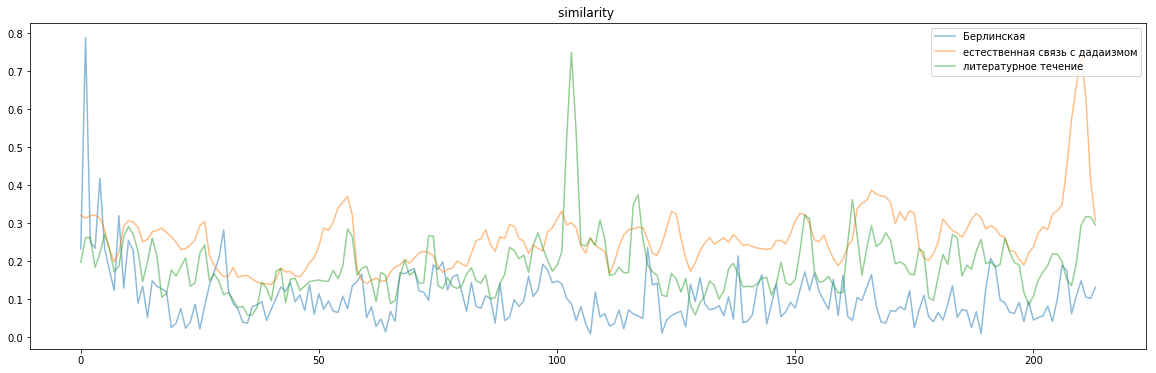

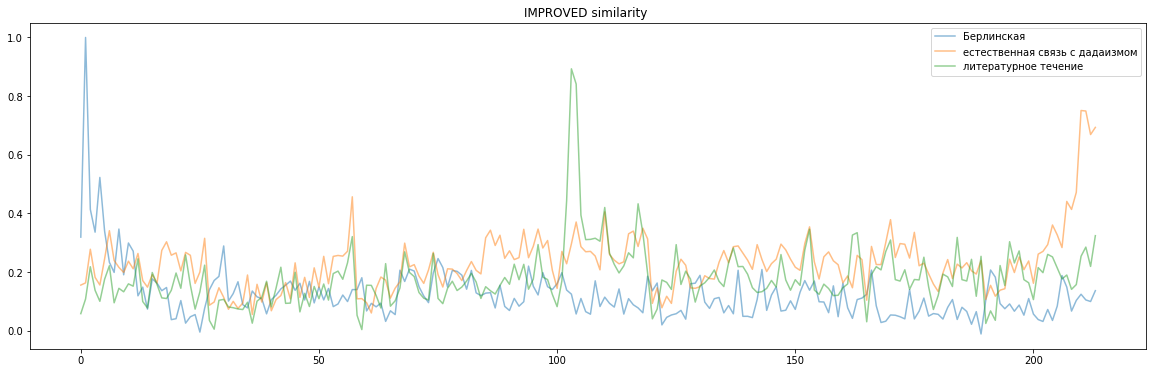

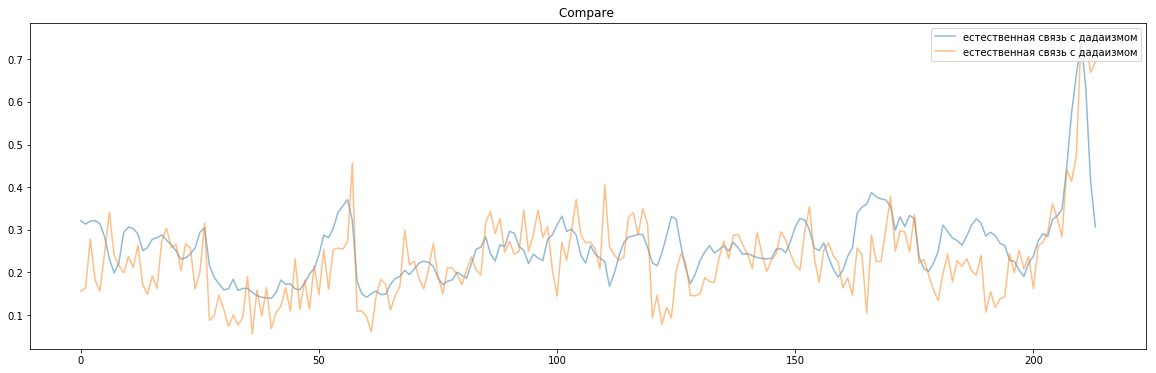

In [15]:
import matplotlib as mpl
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(20, 6))
ax = plt.axes()
for i in range(len(out)):
  ax.plot(out[i], label=' '.join(patterns_tokens_ext[i]) , alpha=0.5)

plt.legend(loc='upper right')
plt.title("similarity ")

fig = plt.figure(figsize=(20, 6))
ax = plt.axes()
for i in range(len(out)):
  ax.plot(improved_attentions[i], label=' '.join(patterns_tokens_ext[i]) , alpha=0.5)

plt.legend(loc='upper right')
plt.title("IMPROVED similarity ")


fig = plt.figure(figsize=(20, 6))
ax = plt.axes()

ax.plot(out[1], label=' '.join(patterns_tokens_ext[1]) , alpha=0.5)
ax.plot(improved_attentions[1], label=' '.join(patterns_tokens_ext[1]) , alpha=0.5)

plt.legend(loc='upper right')
plt.title("Compare ")